In [14]:
!pip freeze | find "qiskit"

qiskit==1.3.1
qiskit-aer==0.15.1
qiskit-algorithms==0.3.1
qiskit-experiments==0.8.1
qiskit-ibm-experiment==0.4.8
qiskit-ibm-provider==0.11.0
qiskit-ibm-runtime==0.34.0
qiskit-machine-learning==0.8.2


In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, QuantumCircuit
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline

In [16]:
# Creating N Qubit Bell Circuit or GHZ circuit

def create_ghz(number_of_clients, qc):
    qc.h(0)
    for i in range(number_of_clients-1):
        qc.cx(i, i+1)
    qc.barrier()
    return qc

In [17]:
# Encoding the data bit on the basis the input. If bit is "0" then apply Identity. 
# If bit is "1" apply "Z gate"

def encode_data(sender, data, qc):
    if data == 0:
        qc.id(sender)
    elif data == 1:
        qc.z(sender)
    qc.barrier()
    return qc

In [18]:
# For decoding apply "Hadamard Gate" on all qubits.

def decoding(number_of_clients, qc):
    clients = [x for x in range(number_of_clients)]
    qc.h(clients)
    return qc

In [19]:
# Measuring all qubits

def measurement(q_reg, c_reg, qc):
    qc.measure(q_reg, c_reg)
    return qc

In [20]:
# Creating the complete circuit

def create_circuit(number_of_clients, sender, data):
    q_reg = QuantumRegister(number_of_clients)
    c_reg = ClassicalRegister(number_of_clients)
    qc = QuantumCircuit(q_reg, c_reg)
    qc = create_ghz(number_of_clients, qc)
    qc = encode_data(sender, data, qc)
    qc = decoding(number_of_clients, qc)
    qc = measurement(q_reg, c_reg, qc)
    return qc

In [21]:
# Executing on the AerSimulator

def execute(qc, shots):
    sim = AerSimulator()
    results = sim.run(qc, shots=shots).result()
    return results

In [22]:
# Data bit can be either "0" or "1"
# sender == sender_index i.e from 0 to number_of_clients -1
number_of_clients = 5
sender = 2
data = 1
shots = 1024

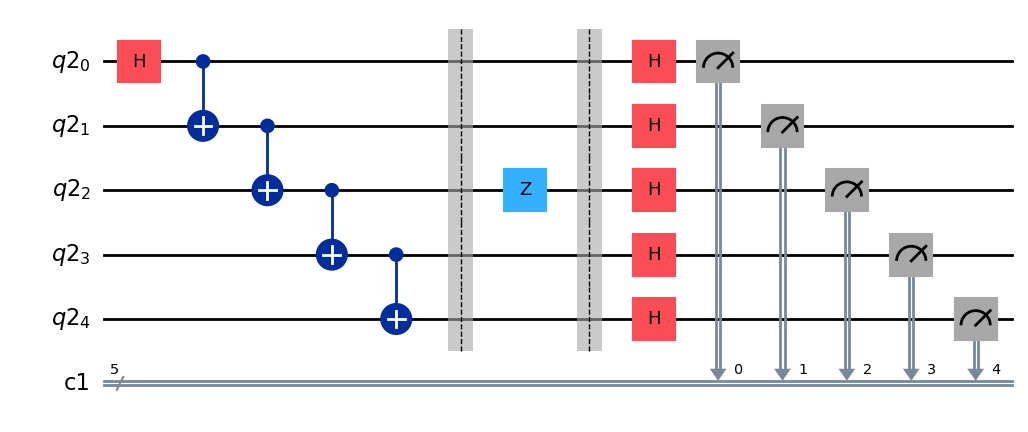

In [23]:
if __name__ == "__main__":
    qc = create_circuit(number_of_clients, sender, data)
    qc.draw("mpl")
    results = execute(qc, shots)
    

# <b>Remember :</b>
- Qiskit follows little-endian convention, meaning qubit 0 is the least significant bit (LSB).
- As a result, measurement outcomes are stored in reverse order.
- If needed, reverse the bitstrings using counts.reverse_bits() or key[::-1].

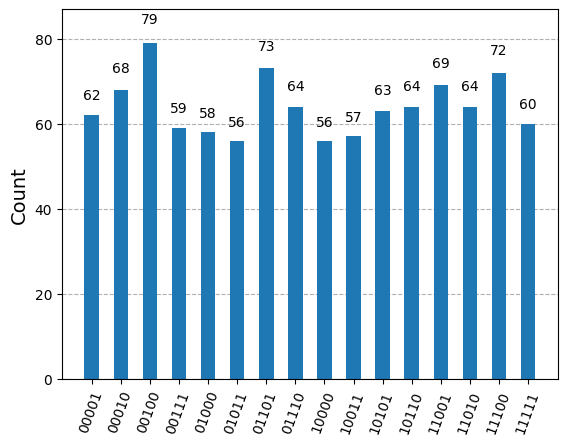

In [24]:
counts = results.get_counts()
hist = plot_histogram(counts)